In [21]:
from DataLoader import DataLoader, DataConcate
from DataFiltering import DataFiltering

from sklearn.preprocessing import MinMaxScaler
from scipy.signal import find_peaks
from ecgdetectors import Detectors

import matplotlib.pyplot as plt
import numpy as np
import os

DATA_EXPORT_PATH = "./data/exported/30sec/"

ecg_data_filtering = DataFiltering(sampling_rate=250)
scaler = MinMaxScaler()

In [3]:
dataconcater = DataConcate()
dataloader = DataLoader()

data_list = os.listdir("./data/walking")
walking_data_list = ["./data/walking" + "/" + data for data in data_list]

data_list = os.listdir("./data/running")
running_data_list = ["./data/running" + "/" + data for data in data_list]

data_list = os.listdir("./data/sitting")
sitting_data_list = ["./data/sitting" + "/" + data for data in data_list]

## Sitting data concating

In [51]:
sitting_ecg_concate = np.zeros((1))
sitting_acc_x_concate, sitting_acc_y_concate, sitting_acc_z_concate = np.zeros((1)), np.zeros((1)), np.zeros((1))

for file_path in sitting_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)

    sitting_ecg_concate = np.concatenate((sitting_ecg_concate, ecg), axis=0)
    sitting_acc_x_concate = np.concatenate((sitting_acc_x_concate, acc_x), axis=0)
    sitting_acc_y_concate = np.concatenate((sitting_acc_y_concate, acc_y), axis=0)
    sitting_acc_z_concate = np.concatenate((sitting_acc_z_concate, acc_z), axis=0)

sitting_ecg_concate = np.array(sitting_ecg_concate[1:])
sitting_acc_x_concate = np.array(sitting_acc_x_concate[1:])
sitting_acc_y_concate = np.array(sitting_acc_y_concate[1:])
sitting_acc_z_concate = np.array(sitting_acc_z_concate[1:])

print(np.shape(sitting_ecg_concate))
print(np.shape(sitting_acc_x_concate))
print(np.shape(sitting_acc_y_concate))
print(np.shape(sitting_acc_z_concate))

NON Mobile ./data/sitting/relax_sitting_status.txt
(230650,)
(23065,)
(23065,)
(23065,)


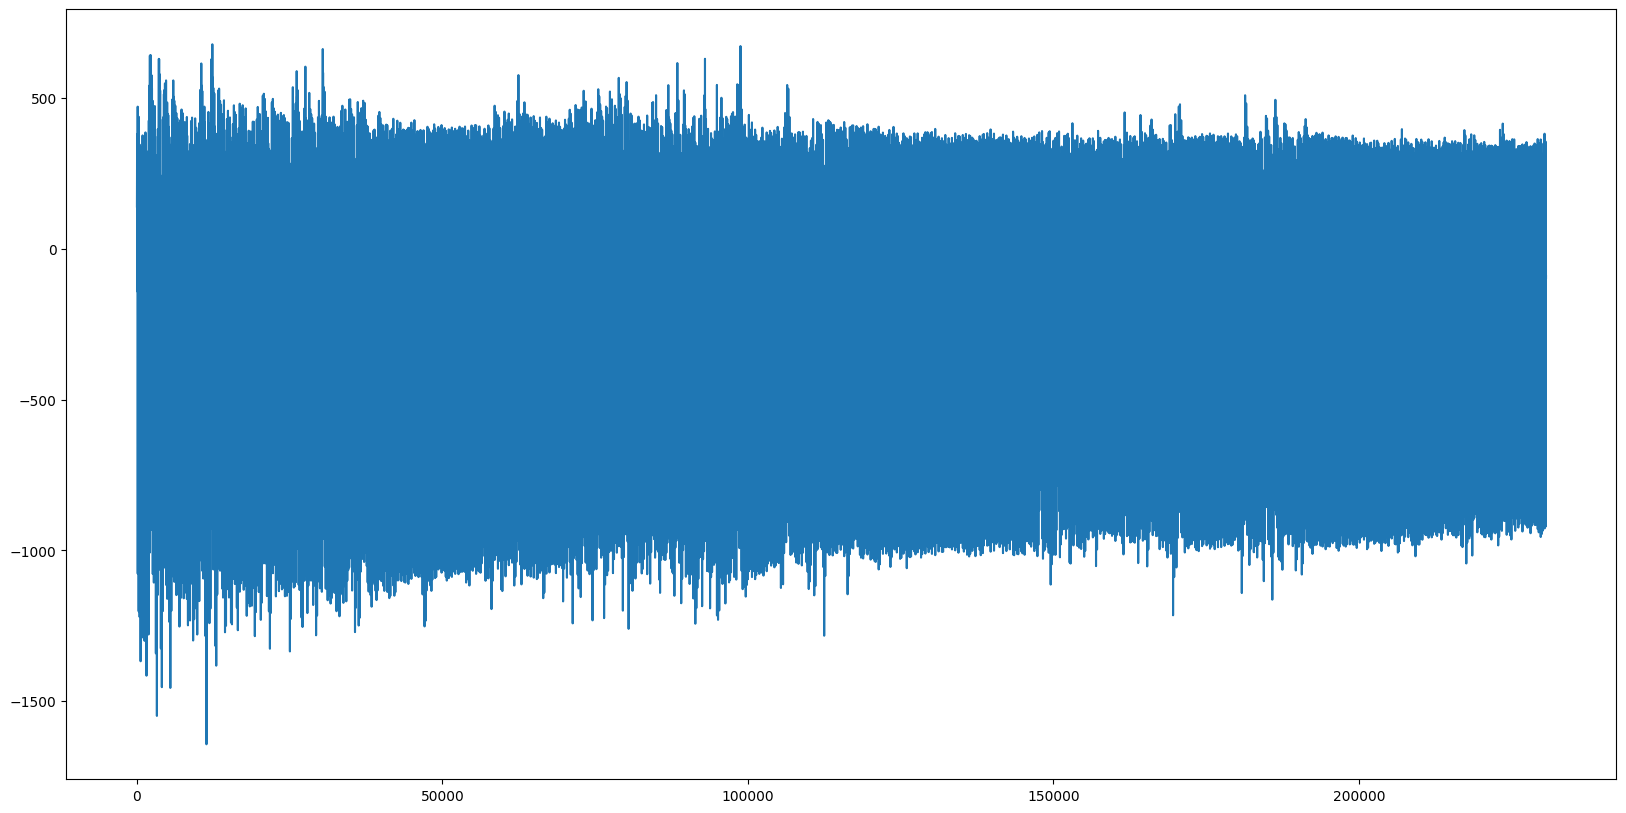

In [52]:
sitting_ecg_filtered = ecg_data_filtering.bandstop_filter(sitting_ecg_concate)

plt.figure(figsize=(20, 10))
plt.plot(sitting_ecg_filtered)
plt.show()

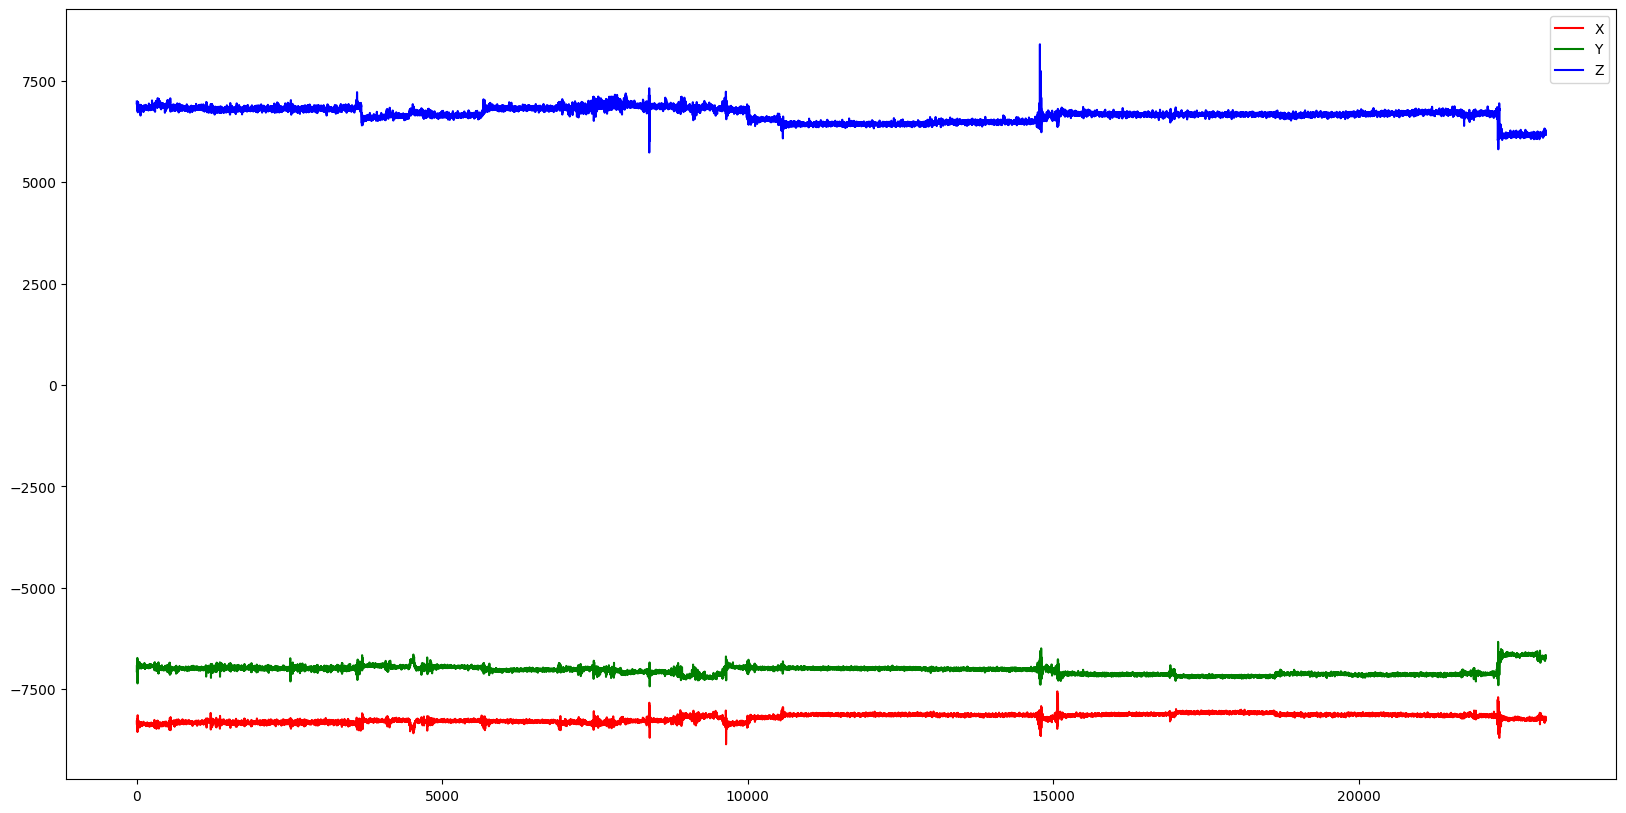

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(sitting_acc_x_concate, color='red', label="X")
plt.plot(sitting_acc_y_concate, color='green', label="Y")
plt.plot(sitting_acc_z_concate, color='blue', label="Z")
plt.legend()
plt.show()

In [55]:
walking_ecg_concate = np.zeros((1))
walking_acc_x_concate, walking_acc_y_concate, walking_acc_z_concate = np.zeros((1)), np.zeros((1)), np.zeros((1))

for file_path in walking_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)

    walking_ecg_concate = np.concatenate((walking_ecg_concate, ecg), axis=0)
    walking_acc_x_concate = np.concatenate((walking_acc_x_concate, acc_x), axis=0)
    walking_acc_y_concate = np.concatenate((walking_acc_y_concate, acc_y), axis=0)
    walking_acc_z_concate = np.concatenate((walking_acc_z_concate, acc_z), axis=0)

walking_ecg_concate = walking_ecg_concate[1:]
walking_acc_x_concate = walking_acc_x_concate[1:]
walking_acc_y_concate = walking_acc_y_concate[1:]
walking_acc_z_concate = walking_acc_z_concate[1:]

print(np.shape(walking_ecg_concate))
print(np.shape(walking_acc_x_concate))
print(np.shape(walking_acc_y_concate))
print(np.shape(walking_acc_z_concate))

NON Mobile ./data/walking/ground_walking_test2.txt
NON Mobile ./data/walking/walking_test.txt
MOBILE ./data/walking/mobile_ground_walking_1.txt
MOBILE ./data/walking/mobile_ground_walking_2.txt
NON Mobile ./data/walking/ground_walking_test.txt
(696000,)
(69600,)
(69600,)
(69600,)


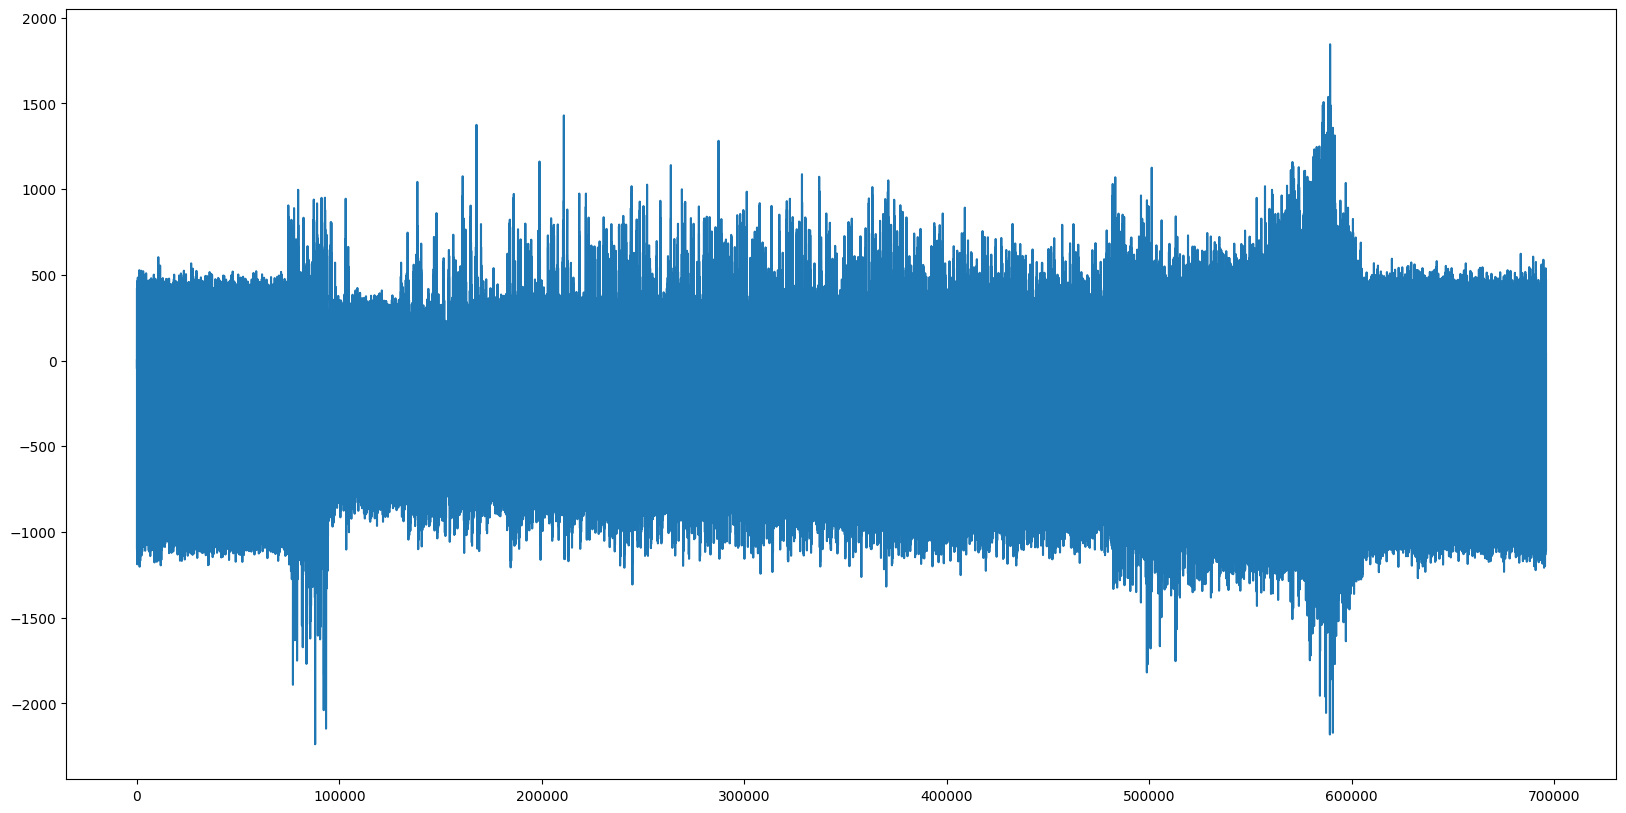

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(walking_ecg_concate)
plt.show()

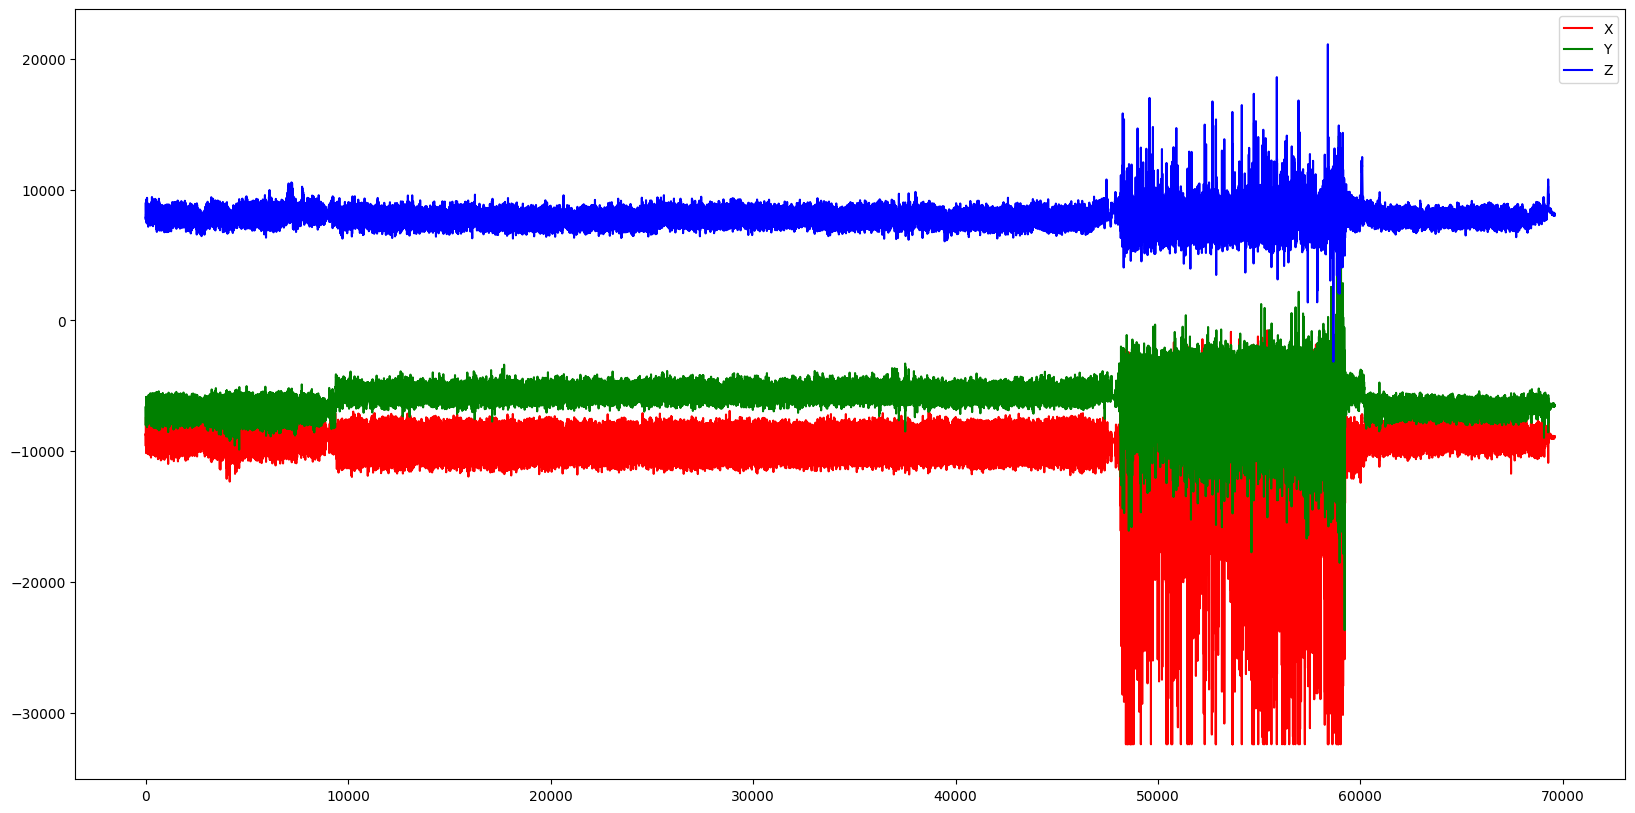

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(walking_acc_x_concate, color='red', label="X")
plt.plot(walking_acc_y_concate, color='green', label="Y")
plt.plot(walking_acc_z_concate, color='blue', label="Z")
plt.legend()
plt.show()

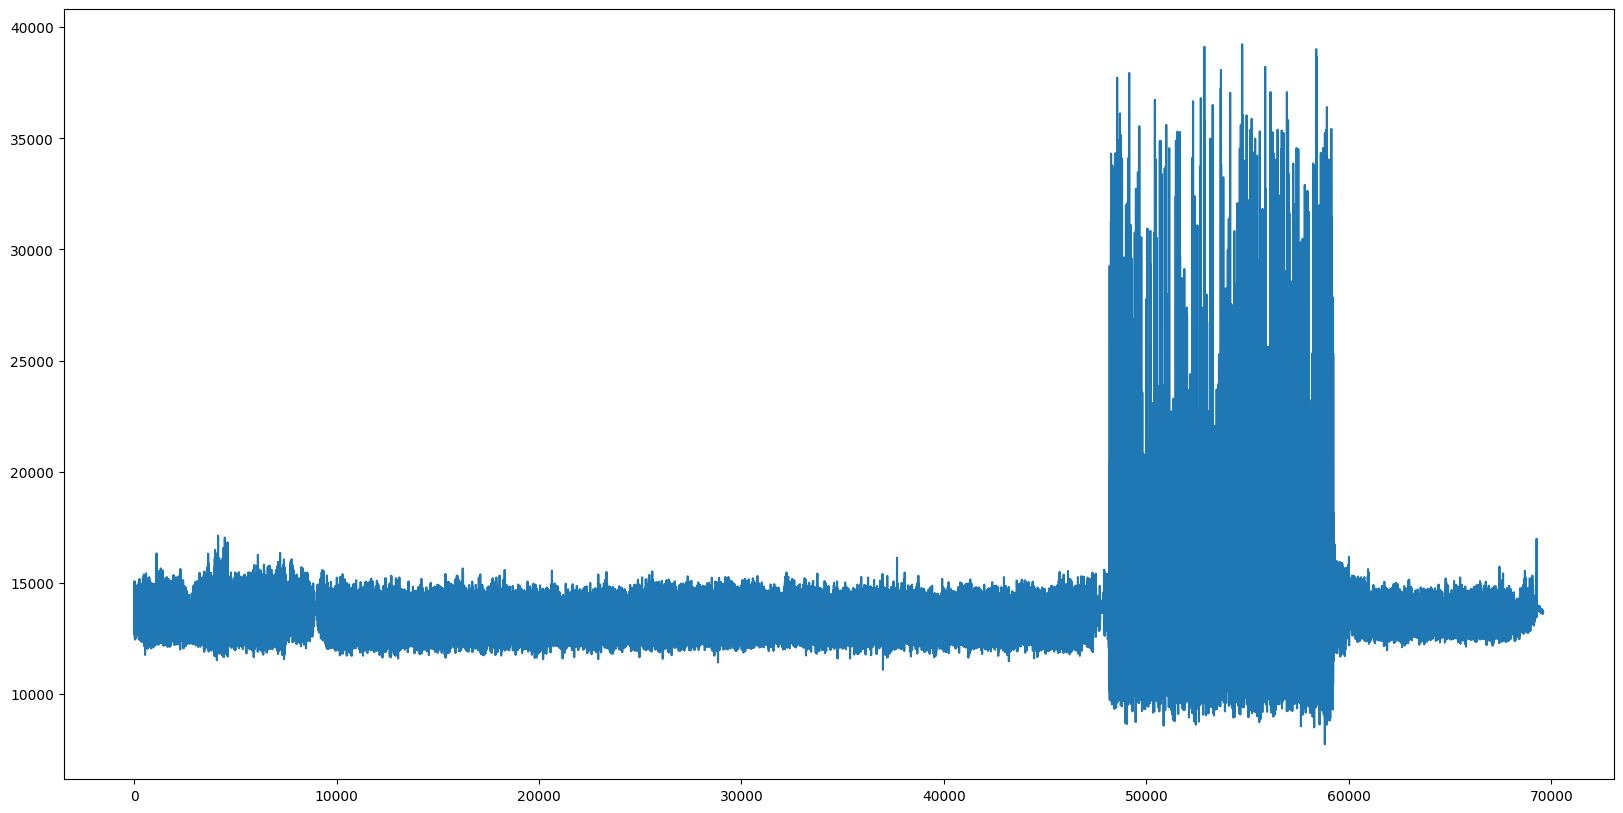

In [61]:
acc_combined = np.sqrt(np.square(walking_acc_x_concate) + np.square(walking_acc_y_concate) + np.square(walking_acc_z_concate))

plt.figure(figsize=(20, 10))
plt.plot(acc_combined)
plt.show()

# Running

In [58]:
running_ecg_concate = np.zeros((1))
running_acc_x_concate, running_acc_y_concate, running_acc_z_concate = np.zeros((1)), np.zeros((1)), np.zeros((1))

for file_path in running_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)

    running_ecg_concate = np.concatenate((running_ecg_concate, ecg), axis=0)
    running_acc_x_concate = np.concatenate((running_acc_x_concate, acc_x), axis=0)
    running_acc_y_concate = np.concatenate((running_acc_y_concate, acc_y), axis=0)
    running_acc_z_concate = np.concatenate((running_acc_z_concate, acc_z), axis=0)

running_ecg_concate = running_ecg_concate[1:]
running_acc_x_concate = running_acc_x_concate[1:]
running_acc_y_concate = running_acc_y_concate[1:]
running_acc_z_concate = running_acc_z_concate[1:]

print(np.shape(running_ecg_concate))
print(np.shape(running_acc_x_concate))
print(np.shape(running_acc_y_concate))
print(np.shape(running_acc_z_concate))

MOBILE ./data/running/mobile_ground_running_1.txt
NON Mobile ./data/running/machine_running_test2.txt
NON Mobile ./data/running/machine_running_test1.txt
(304900,)
(30490,)
(30490,)
(30490,)


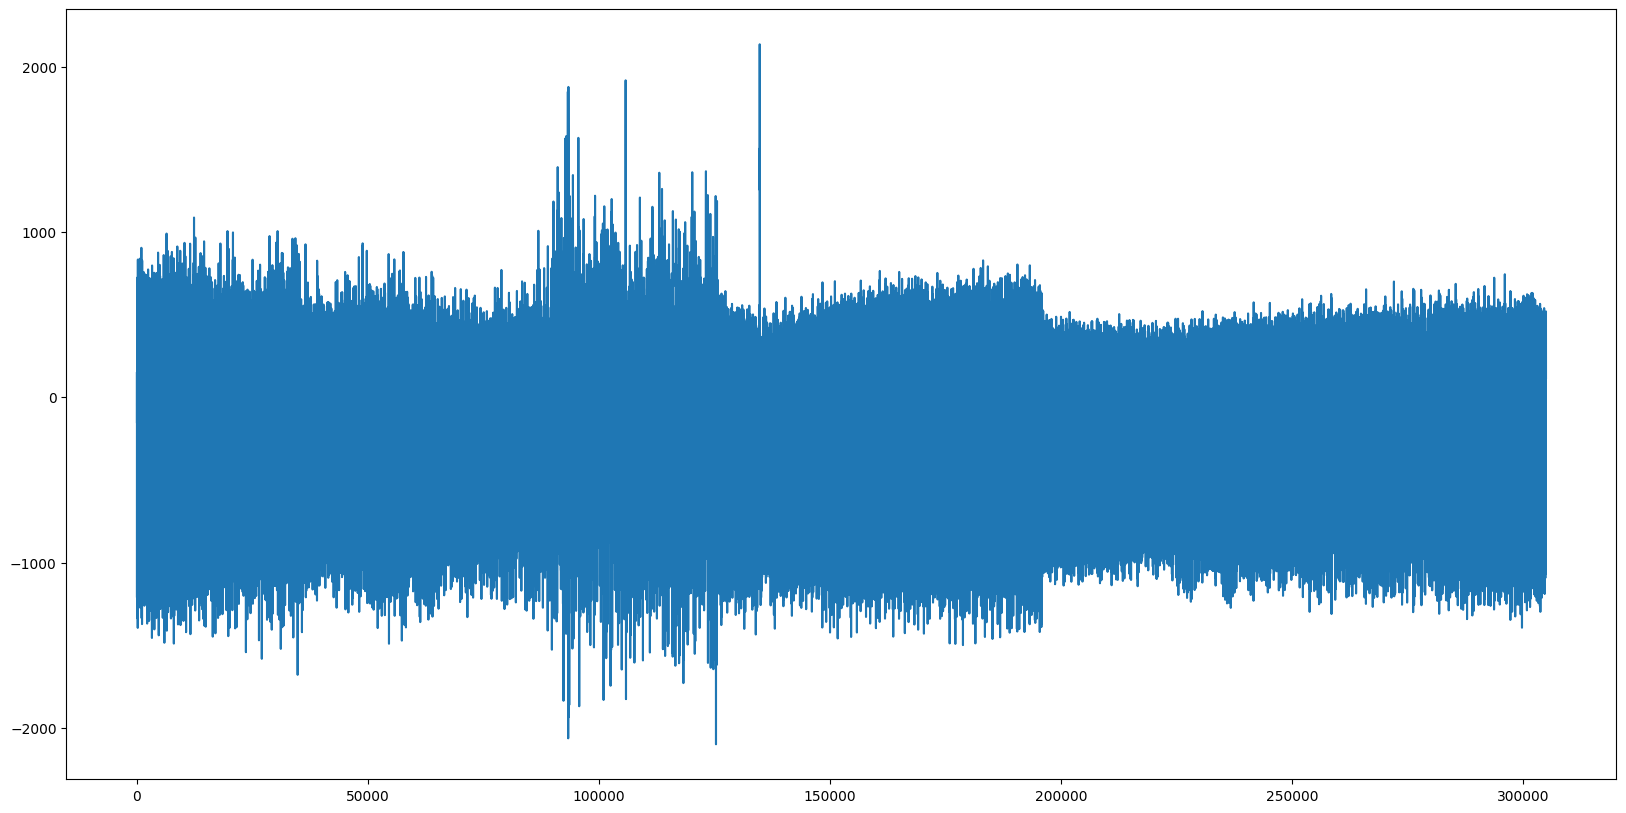

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(running_ecg_concate)
plt.show()

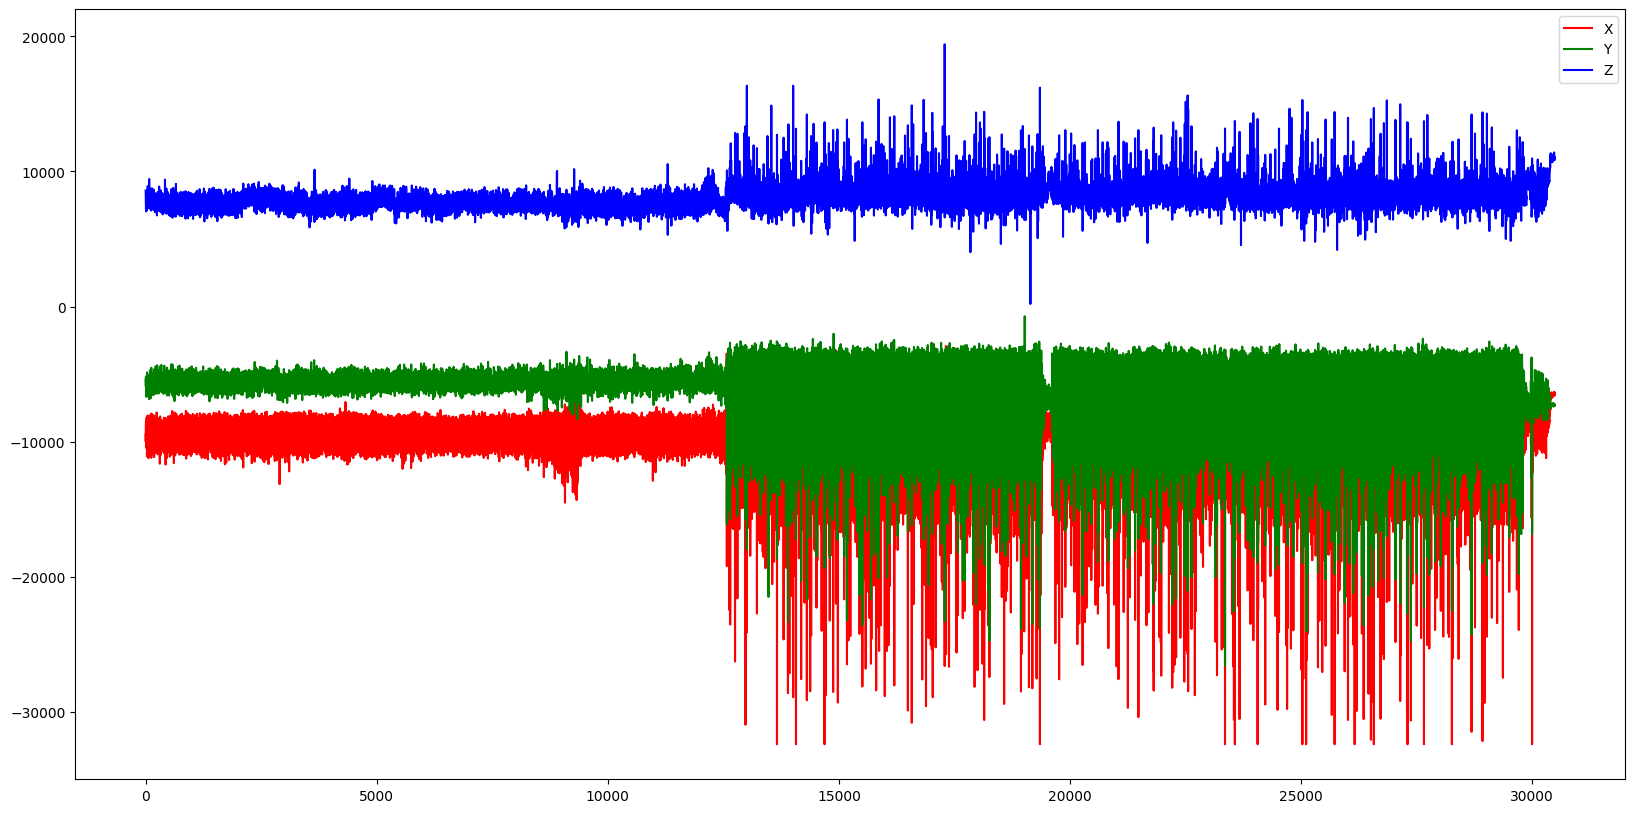

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(running_acc_x_concate, color='red', label="X")
plt.plot(running_acc_y_concate, color='green', label="Y")
plt.plot(running_acc_z_concate, color='blue', label="Z")
plt.legend()
plt.show()

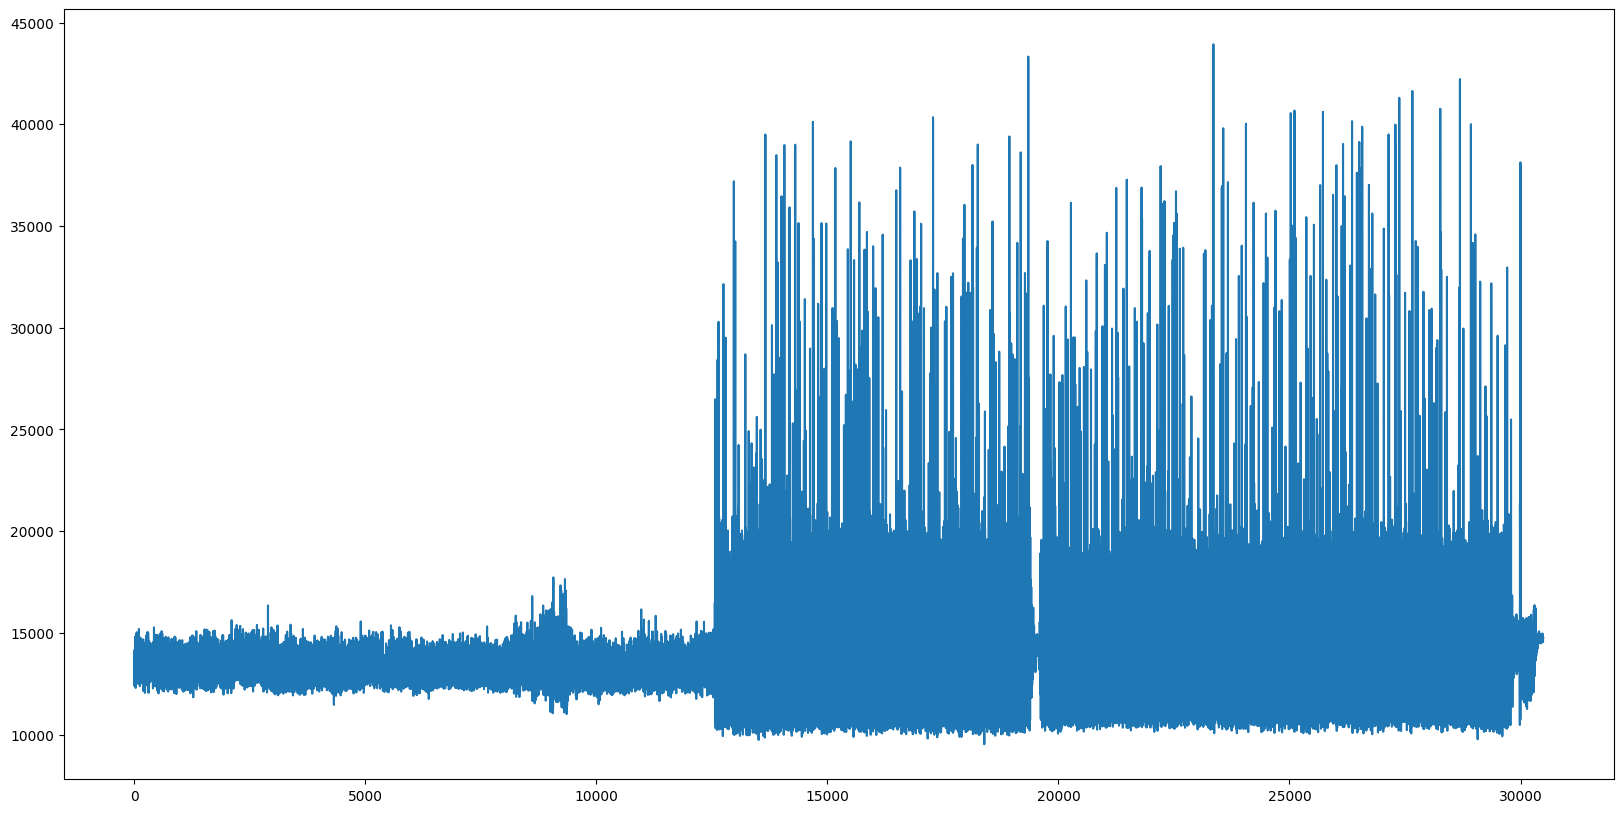

In [62]:
acc_combined = np.sqrt(np.square(running_acc_x_concate) + np.square(running_acc_y_concate) + np.square(running_acc_z_concate))

plt.figure(figsize=(20, 10))
plt.plot(acc_combined)
plt.show()

# Each data Plot

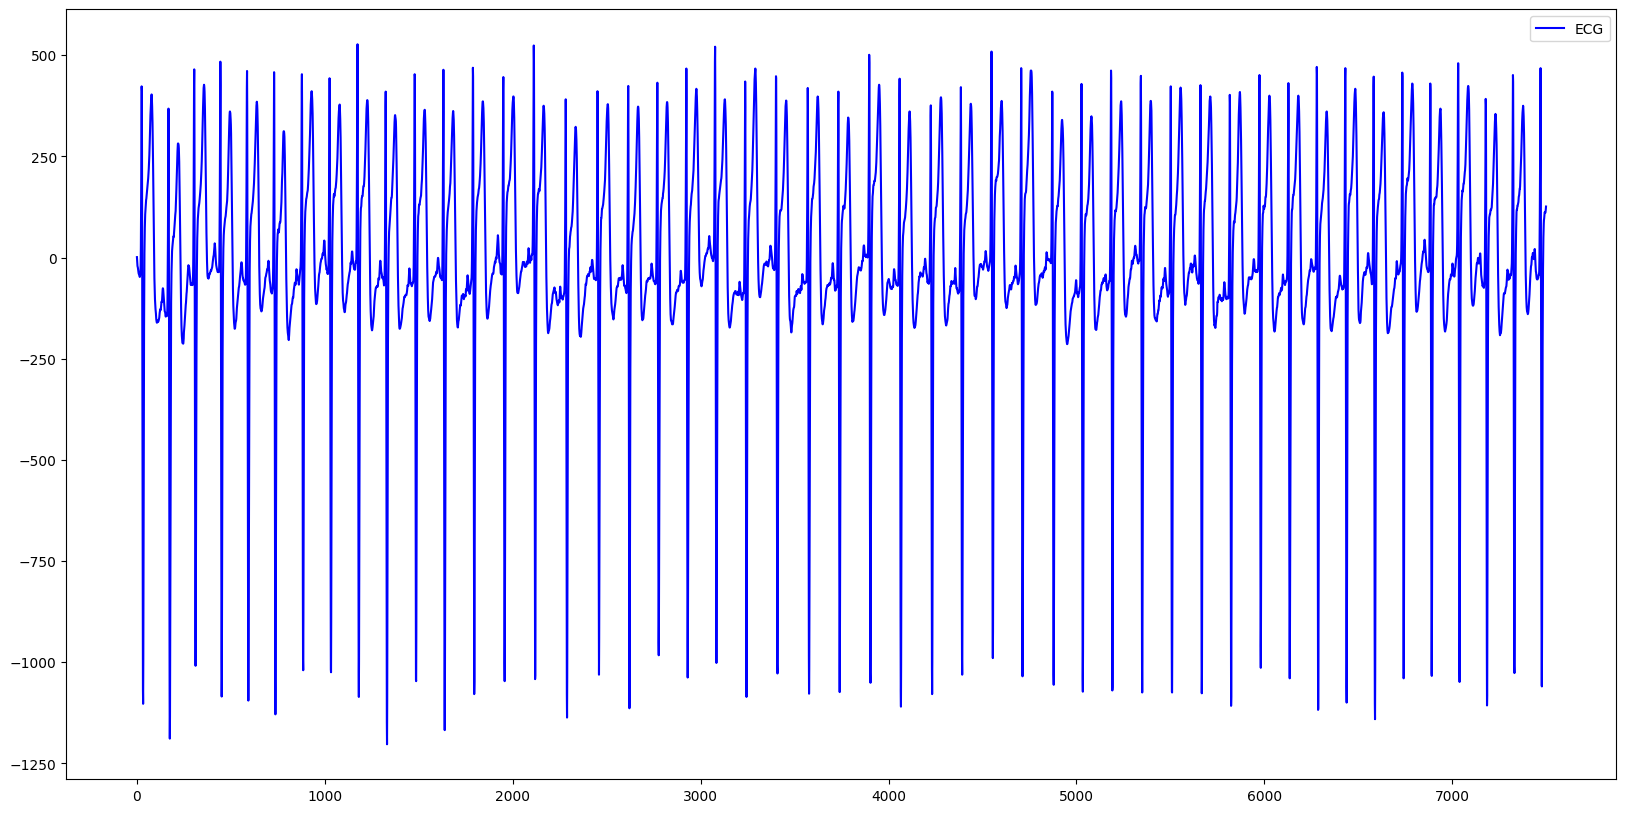

In [49]:
view_sec = 30
view_size = view_sec * 250

detector = Detectors(250)

peaks = detector.pan_tompkins_detector(walking_ecg_concate[:view_size])
peaks = np.array(peaks)

plt.figure(figsize=(20, 10))
plt.plot(walking_ecg_concate[:view_size], color="blue", label="ECG")
# plt.plot(peaks, walking_ecg_concate[:view_size][peaks], "*", color="red", label="R-Peaks", markersize=10, linestyle=":")
plt.legend()
plt.show()

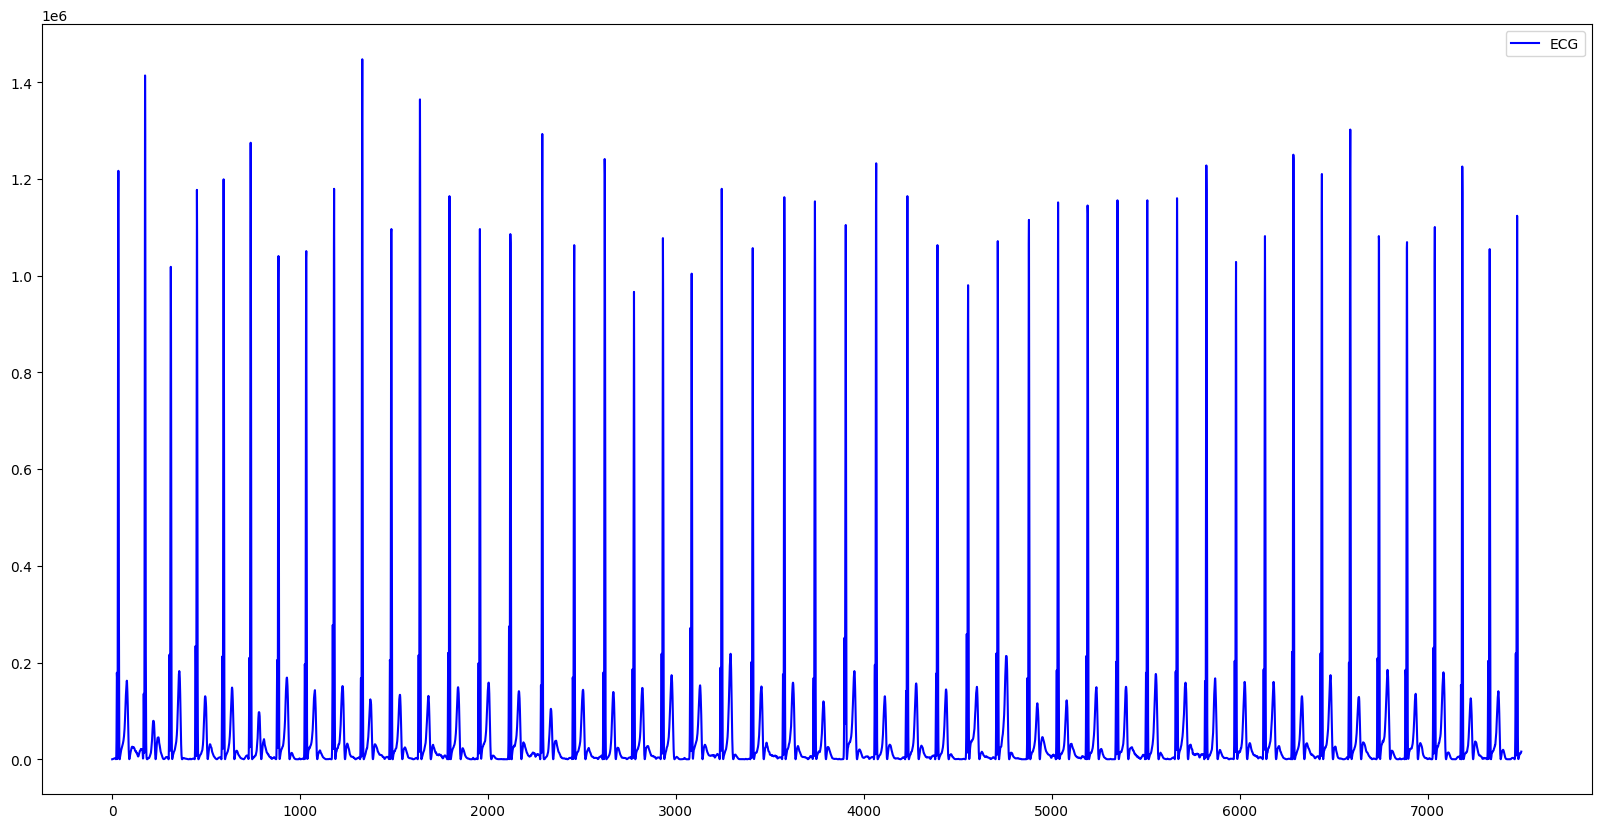

In [50]:
view_sec = 30
view_size = view_sec * 250

detector = Detectors(250)

peaks = detector.pan_tompkins_detector(walking_ecg_concate[:view_size])
peaks = np.array(peaks)

plt.figure(figsize=(20, 10))
plt.plot(walking_ecg_concate[:view_size] ** 2, color="blue", label="ECG")
# plt.plot(peaks, walking_ecg_concate[:view_size][peaks], "*", color="red", label="R-Peaks", markersize=10, linestyle=":")
plt.legend()
plt.show()

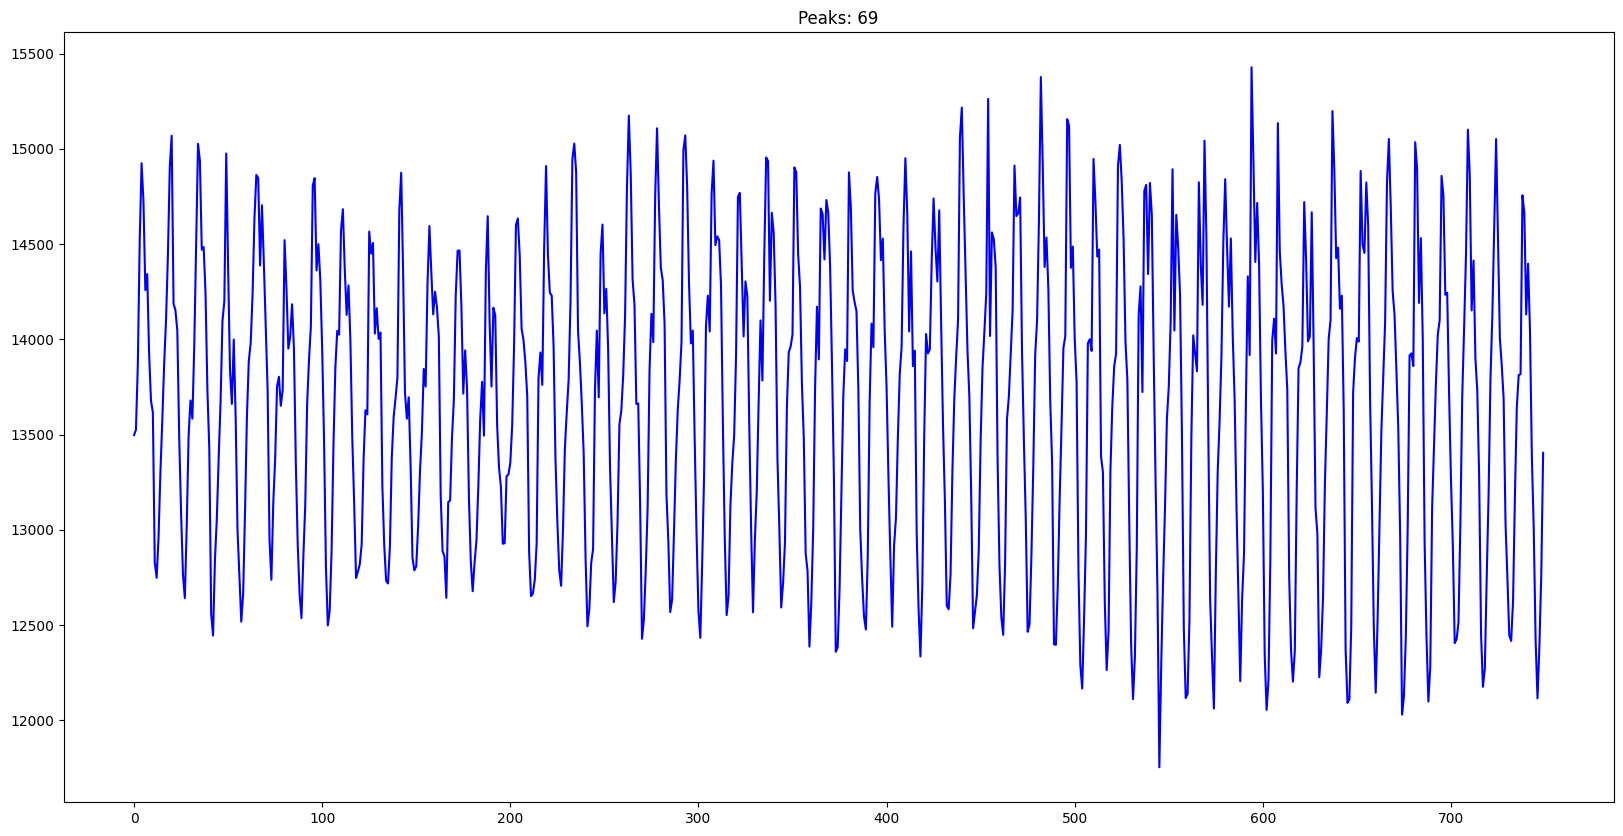

In [48]:
view_sec = 30
view_point = view_sec * 25

peaks, _ = find_peaks(walking_acc_concate[:view_point], height=np.mean(walking_acc_concate[:view_point]) + np.std(walking_acc_concate[:view_point]))

plt.figure(figsize=(20, 10))
plt.title(f"Peaks: {len(peaks)}")
# plt.plot(np.ones((view_point)) * (np.mean(walking_acc_concate[:view_point]) + np.std(walking_acc_concate[:view_point])), color="red", label="Threshold")
plt.plot(walking_acc_concate[:view_point], color="blue", label="ECG")
# plt.plot(peaks, walking_acc_concate[:view_point][peaks], "x", color="red", linestyle="--")
plt.show()